In [1]:
# optional but useful for debugging - reimports modules after editing and saving .py files
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import astropy
from astropy import units as u
import astromet
import matplotlib.pyplot as plt
import matplotlib as mpl

In [3]:
print(dir(astromet))

['AU', 'AU_c', 'Delta', 'G', 'Galt', 'Gyr', 'T', 'Time', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'agis', 'agis_2d_prior', 'astromet', 'astropy', 'barycentricPosition', 'binaryMotion', 'bjd_to_bjyr', 'bjyr_to_bjd', 'bodyPos', 'c', 'dThetaEstimate', 'day', 'design_matrix', 'downweight', 'e', 'en_fit', 'findEtas', 'fit', 'fit_model', 'gaia_fit', 'get_gaiat', 'get_obmt', 'kpc', 'lSun', 'mSun', 'mas', 'mas2rad', 'mock_obs', 'name', 'np', 'params', 'period', 'sigString', 'sigmagamma', 'splitFit', 'splitInverse', 'splitNormal', 'track', 'u', 'year']


In [4]:
dr2period=22/12 # in years
edr3Period=34/12 # in years
mas=astromet.mas # conversion from degrees to milli-arcseconds

In [124]:
# an object wich holds all the necessary parameters to find the astrometric path
params=astromet.params()

# For this example we'll generate a random binary system

# center of mass parameters
params.RA=360*np.random.rand()
params.Dec=90*(-1+2*np.random.rand())
print('RA and Dec [degrees]: \n',params.RA,params.Dec)
params.pmRAc=10*np.random.randn()
params.pmDec=10*np.random.randn()
print('Proper motion in RA and Dec [mas/yr]: \n',params.pmRAc,params.pmDec)
params.pllx=1+9*np.random.rand()
print('Parallax [mas]: \n',params.pllx)

# binary parameters
params.M=1000*np.random.rand()**2
print('Mass of brightest source [mSun]: \n',params.M)
params.a=100*np.random.rand()
print('Semi-major axis [AU]: \n',params.a)
params.e=np.random.rand()
print('Eccentricity [dimensionless]: \n',params.e)
params.q=10*(np.random.rand()**4)
params.l=np.random.rand()
print('Light (l<1) and mass (q) ratios of binary [dimensionless]: \n',params.l,params.q)
params.vPhi=2*np.pi*np.random.rand()
params.vTheta=np.pi*np.random.rand()
print('On-sky projection angles (vPhi and vTheta) of binary [radians]: \n',params.vPhi,params.vTheta)
params.vOmega=2*np.pi*np.random.rand()
print('On-sky orientation angle of binary [radians]: \n',params.vOmega)
params.tPeri=2016+astromet.period(params)*np.random.rand()
print('Time of first binary periapse [years]: \n',params.tPeri)

print('\nPeriod [years]: \n',astromet.period(params))

RA and Dec [degrees]: 
 340.4904690630857 -4.779936568092573
Proper motion in RA and Dec [mas/yr]: 
 1.4593229743186784 -14.758164044375006
Parallax [mas]: 
 7.422334147947476
Mass of brightest source [mSun]: 
 256.4423303101295
Semi-major axis [AU]: 
 78.36021156828473
Eccentricity [dimensionless]: 
 0.00756170173717452
Light (l<1) and mass (q) ratios of binary [dimensionless]: 
 0.3816744489399563 0.296540143732857
On-sky projection angles (vPhi and vTheta) of binary [radians]: 
 1.7490920804180234 2.1795271097526965
On-sky orientation angle of binary [radians]: 
 5.816355936584354
Time of first binary periapse [years]: 
 2052.431131124318

Period [years]: 
 37.94549398867628


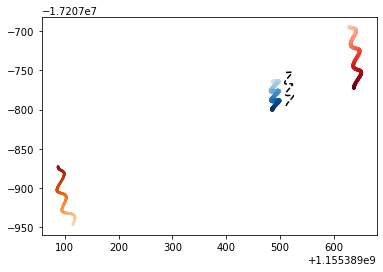

In [125]:
# calculating the on-sky path
plotts=np.linspace(2016-0.5*edr3Period,2016+0.5*edr3Period,256)

# first just the c.o.m. 
raccoms,deccoms=astromet.track(plotts,params,comOnly=True)
# then the positions of the centre of light, and both masses
raccols,deccols,rac1s,dec1s,rac2s,dec2s=astromet.track(plotts,params,allComponents=True)

# colouring by time (white to coloured)
ccols=mpl.cm.Blues(np.interp(plotts,[plotts[0],plotts[-1]],[0.2,1]))
c1s=mpl.cm.Reds(np.interp(plotts,[plotts[0],plotts[-1]],[0.2,1]))
c2s=mpl.cm.Oranges(np.interp(plotts,[plotts[0],plotts[-1]],[0.2,1]))

ss=np.ones_like(plotts)

# plotting
trackPlot=plt.gca()
trackPlot.plot(raccoms,deccoms,c='k',ls='--')
trackPlot.scatter(raccols,deccols,c=ccols,s=10)
trackPlot.scatter(rac1s,dec1s,c=c1s,s=10/(1+params.l))
trackPlot.scatter(rac2s,dec2s,c=c2s,s=10*params.l/(1+params.l))
plt.show()

xvals:  [106808960.33592103, 106808959.86297661]
yvals:  [-83384073.47354567, -83384073.10432541]
xvals:  [103144235.39589317, 103144234.94263503]
yvals:  [-89463069.42175923, -89463069.02862175]
xvals:  [-130899727.5690362, -130899727.01402521]
yvals:  [53763008.236248255, 53763008.00829469]
xvals:  [942003582.4103135, 942003581.9149044]
yvals:  [643610727.0182498, 643610726.6797684]
xvals:  [40691141.86622915, 40691141.88762942]
yvals:  [1140132513.960693, 1140132514.5603108]
xvals:  [-540890660.4104146, -540890660.8746829]
yvals:  [442798741.1901513, 442798741.57022333]
xvals:  [-1061116694.0625689, -1061116694.6507034]
yvals:  [-214219994.4268253, -214219994.5455589]
xvals:  [-69693577.24357875, -69693577.28000817]
yvals:  [-1145749328.5339816, -1145749329.1328745]
xvals:  [722484181.4944795, 722484182.0619471]
yvals:  [248123132.32719308, 248123132.52207878]
xvals:  [539804639.9560719, 539804640.3895301]
yvals:  [-516651135.1000032, -516651135.5148693]
xvals:  [119384959.91359584,

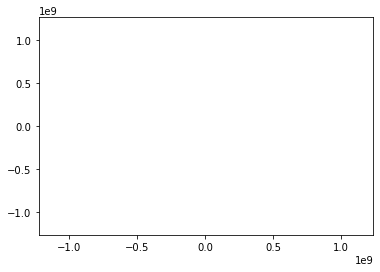

In [133]:
# simulating observables

# times when system is observed [years, CE]
ts=2016+np.sort(edr3Period*(-0.5+np.random.rand(50)))

racs,decs=astromet.track(ts,params)

phis=360*np.random.rand(ts.size)

talls=np.hstack([ts,ts])
phialls=np.hstack([phis,phis+90])
racalls=np.hstack([racs,racs])
decalls=np.hstack([decs,decs])
erralls=np.hstack([0.3*np.ones(ts.size),np.ones(ts.size)])

xs=astromet.mock_obs(phialls,racalls,decalls,errs=erralls)

results=astromet.gaia_fit(talls,xs,phialls,erralls,params.RA,params.Dec)

scanPlot=plt.gca()
for i in range(xs.size):
    xvals=[(xs[i]-erralls[i])*np.sin(phialls[i]),(xs[i]+erralls[i])*np.sin(phialls[i])]
    yvals=[(xs[i]-erralls[i])*np.cos(phialls[i]),(xs[i]+erralls[i])*np.cos(phialls[i])]
    print('xvals: ',xvals)
    print('yvals: ',yvals)
    scanPlot.plot(xvals,yvals)
plt.show()

In [ ]:
print(ras)

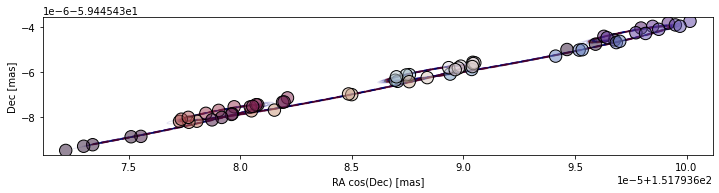

In [372]:
# plotting on sky motion
qFig=plt.figure(figsize=(12,8))
qPl=plt.gca() # defining matplotlib axis object on which to plot

cs=mpl.cm.twilight_shifted(np.interp(ts,[ts[0],ts[-1]],[0,1])) # optional, but I like to color by time
cs[:,3]=0.5

# plotting the datapoints (ideally as error ellipses -
# if that fails comment out the for loop and use the simpler scatter plot instead)
for i in range(ras.size):
    ell = mpl.patches.Ellipse(xy=(ras[i]*np.cos(decs[i]*np.pi/180), decs[i]),
                  width=2*astError*mas, height=2*astError*mas,
                  angle=0)
    ell.set_facecolor(cs[i])
    ell.set_edgecolor('k')
    qPl.add_artist(ell)
#qPl.scatter(ras*np.cos(decs*np.pi/180),decs,s=50,c=cs,zorder=2,edgecolors='k',lw=1)

# uniformly sampled times for plotting true paths
tUniform=np.linspace(ts[0],ts[-1],1000)

# optional - adding the centre of mass motion (black) for reference
comRas,comDecs=astromet.path(tUniform,params,comOnly=True)
qPl.plot(comRas*np.cos(comDecs*np.pi/180),comDecs,lw=1,c='k',alpha=0.5,zorder=1)

# optional - adding the centre of mass motion (red) for reference
trueRas,trueDecs=astromet.path(tUniform,params)
qPl.plot(trueRas*np.cos(trueDecs*np.pi/180),trueDecs,lw=2,c='darkred',alpha=0.5,zorder=1,ls='--')

# optional - adding fitted motion (blue)
for i in range(32):
    sampleParams = np.random.multivariate_normal(fitParams, fitCovariance)
    
    fitPs=astromet.params()
    fitPs.RA=np.median(ras)+mas*sampleParams[0]
    fitPs.Dec=np.median(decs)+mas*sampleParams[1]
    fitPs.pmRA=sampleParams[2]
    fitPs.pmDec=sampleParams[3]
    fitPs.pllx=sampleParams[4]
    bestRas,bestDecs=astromet.path(tUniform,fitPs,comOnly=True)
    qPl.plot(bestRas*np.cos(bestDecs*np.pi/180),bestDecs,lw=1,c='darkblue',alpha=0.1,zorder=0)
fitPs=astromet.params()
fitPs.RA=np.median(ras)+mas*fitParams[0]
fitPs.Dec=np.median(decs)+mas*fitParams[1]
fitPs.pmRA=fitParams[2]
fitPs.pmDec=fitParams[3]
fitPs.pllx=fitParams[4]
bestRas,bestDecs=astromet.path(tUniform,fitPs,comOnly=True)
qPl.plot(bestRas*np.cos(bestDecs*np.pi/180),bestDecs,lw=2,c='darkblue',alpha=0.8,zorder=0,ls='--')

# adding initial position and proper motion as arrow
#qPl.arrow(np.median(ras*np.cos(decs*np.pi/180)),np.median(decs),mas*params.pmRA,mas*params.pmDec,color='k',alpha=0.5)

qPl.set_xlabel('RA cos(Dec) [mas]')
qPl.set_ylabel('Dec [mas]')
qPl.set_aspect('equal')

plt.show()

In [373]:
print('Period: ',astromet.period(params))
print('eccentricity: ',params.e)
uweobs=astromet.uwe(ts,ras,decs,fitParams,astError=1)
print('____________UWE obs: ',uweobs)
dthetapred=astromet.dThetaEstimate(params,ts[0],ts[-1])
print('____________UWE predicted: ',np.sqrt(1+(dthetapred)**2))
dthetasimp=astromet.dThetaEstimate(params,ts[0],ts[0]+params.P)
print('____________UWE simple: ',np.sqrt(1+(dthetasimp)**2))

Period:  3.1434281947297515
eccentricity:  0.8245063389081532
____________UWE obs:  1.0161110129695214
____________UWE predicted:  1.0
____________UWE simple:  1.0
